In [1]:
!pip install --upgrade dask[complete] matplotlib seaborn pandas numpy scikit-learn

  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_aarch64.manylinux2014_aarch64.whl.metadata (63 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import dask
from dask import delayed, compute
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# Load datasets
path = "/home/work/Final/"
dataset_files = [
    "features_watch_a.csv",
    "features_watch_g.csv",
    "features_phone_a.csv",
    "features_phone_g.csv"
]

In [4]:
def average_classification_reports(reports):
    keys = list(reports[0].keys())
    avg_report = {}
    all_class_labels = set()
    for r in reports:
        all_class_labels.update([k for k in r.keys() if k not in ['accuracy', 'macro avg', 'weighted avg']])
    all_class_labels = sorted(all_class_labels, key=lambda x: (not x.isdigit(), x))
    for k in keys:
        if k == 'accuracy':
            avg_report[k] = np.mean([r.get(k, 0) for r in reports])
        elif isinstance(reports[0][k], dict):
            avg_report[k] = {}
            if k in all_class_labels or k in ['macro avg', 'weighted avg']:
                metrics = set()
                for r in reports:
                    if k in r:
                        metrics.update(r[k].keys())
                for metric in metrics:
                    vals = [r[k][metric] for r in reports if k in r and metric in r[k]]
                    avg_report[k][metric] = np.mean(vals) if vals else 0
        else:
            avg_report[k] = np.mean([r.get(k, 0) for r in reports])
    for class_label in all_class_labels:
        if class_label not in avg_report:
            avg_report[class_label] = {'precision': 0, 'recall': 0, 'f1-score': 0, 'support': 0}
    return avg_report

summary_results = []


=== Running LOSO on features_watch_a.csv ===
Average Train Accuracy: 0.739
Average Test Accuracy:  0.723

Average Confusion Matrix (Normalized by True Class):
[[5.28625954e-01 1.04007634e-01 8.77862595e-02 0.00000000e+00
  9.54198473e-04 0.00000000e+00 3.05343511e-02 1.38358779e-01
  3.33969466e-02 0.00000000e+00 0.00000000e+00 2.86259542e-03
  7.34732824e-02]
 [0.00000000e+00 9.58048780e-01 9.75609756e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.95121951e-03 0.00000000e+00
  1.26829268e-02 2.14634146e-02 0.00000000e+00 1.95121951e-03
  2.92682927e-03]
 [1.12403101e-01 1.16279070e-02 3.59496124e-01 4.84496124e-03
  1.93798450e-03 0.00000000e+00 2.32558140e-02 2.45155039e-01
  2.22868217e-02 5.81395349e-03 0.00000000e+00 9.68992248e-04
  2.12209302e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 6.35849057e-01
  1.98113208e-01 4.71698113e-02 1.03773585e-02 6.60377358e-03
  1.88679245e-03 0.00000000e+00 3.67924528e-02 1.88679245e-03
  6.13207547e-02]
 [0.00000000e+00 0.00000

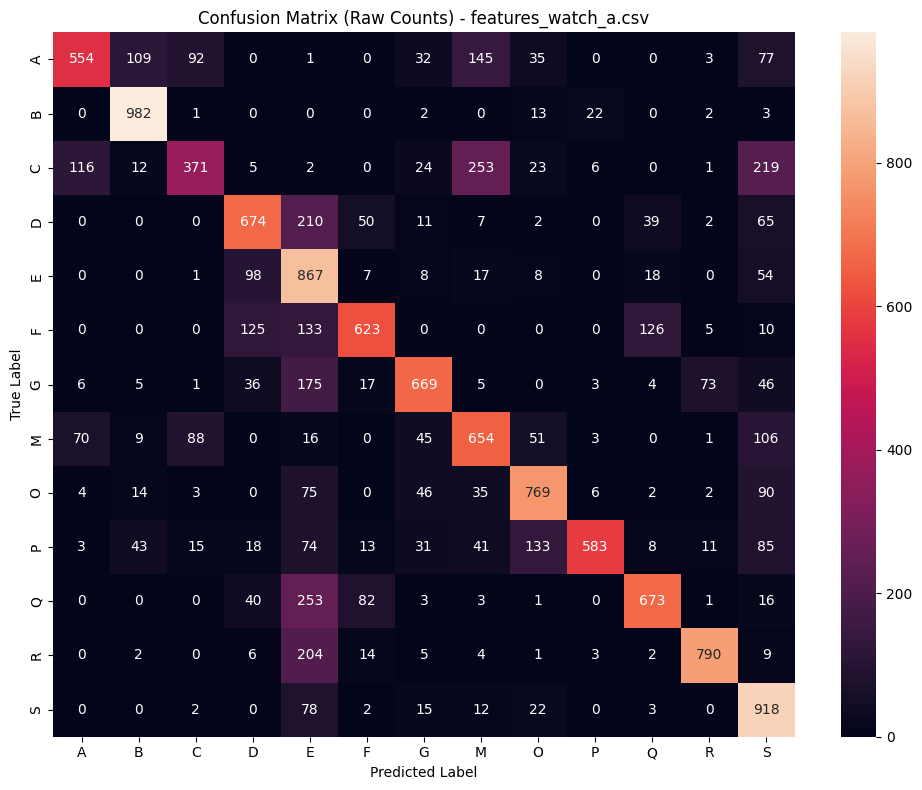

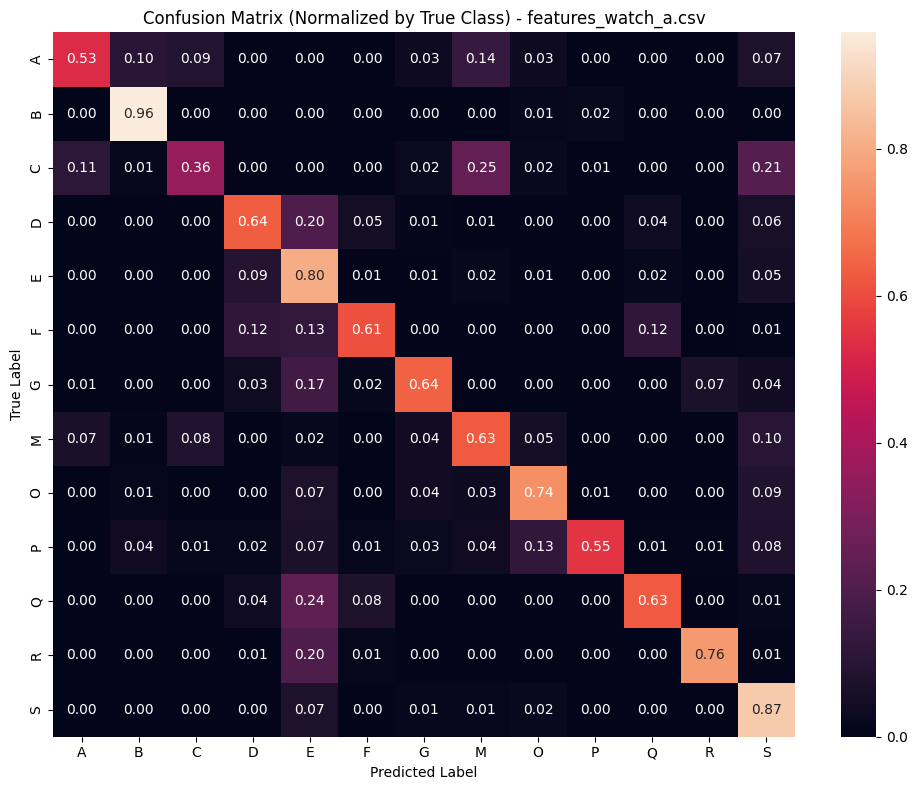


Average Classification Report:
A: Precision: 0.756, Recall: 0.586, F1-score: 0.621
B: Precision: 0.916, Recall: 0.953, F1-score: 0.921
C: Precision: 0.608, Recall: 0.377, F1-score: 0.420
D: Precision: 0.768, Recall: 0.703, F1-score: 0.689
E: Precision: 0.756, Recall: 0.821, F1-score: 0.744
F: Precision: 0.692, Recall: 0.679, F1-score: 0.647
G: Precision: 0.807, Recall: 0.709, F1-score: 0.721
M: Precision: 0.616, Recall: 0.652, F1-score: 0.609
O: Precision: 0.714, Recall: 0.813, F1-score: 0.745
P: Precision: 0.802, Recall: 0.633, F1-score: 0.656
Q: Precision: 0.731, Recall: 0.725, F1-score: 0.691
R: Precision: 0.832, Recall: 0.861, F1-score: 0.834
S: Precision: 0.639, Recall: 0.927, F1-score: 0.736

Overall Accuracy: 0.723


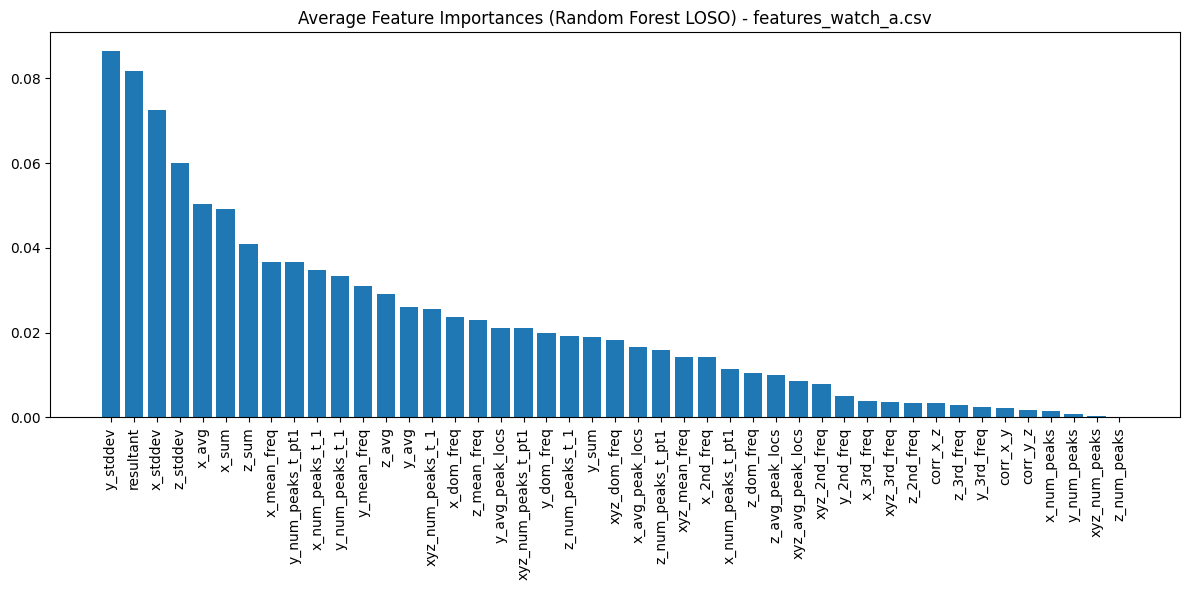


=== Running LOSO on features_watch_g.csv ===
Average Train Accuracy: 0.703
Average Test Accuracy:  0.664

Average Confusion Matrix (Normalized by True Class):
[[0.71698113 0.00628931 0.00838574 0.         0.         0.00524109
  0.01257862 0.08490566 0.04821803 0.         0.00209644 0.00314465
  0.11215933]
 [0.00322581 0.86344086 0.         0.         0.00107527 0.
  0.00215054 0.00215054 0.04731183 0.0172043  0.         0.01827957
  0.04516129]
 [0.18638393 0.02120536 0.18861607 0.         0.01227679 0.
  0.00892857 0.37834821 0.04799107 0.         0.         0.00223214
  0.15401786]
 [0.00207469 0.00103734 0.00829876 0.54875519 0.30394191 0.02904564
  0.00518672 0.0373444  0.         0.         0.03319502 0.0093361
  0.02178423]
 [0.00416233 0.         0.00208117 0.16337149 0.72112383 0.01040583
  0.01248699 0.05931322 0.00104058 0.         0.01873049 0.00104058
  0.0062435 ]
 [0.         0.         0.         0.05933118 0.14886731 0.60733549
  0.01725998 0.00431499 0.         0.  

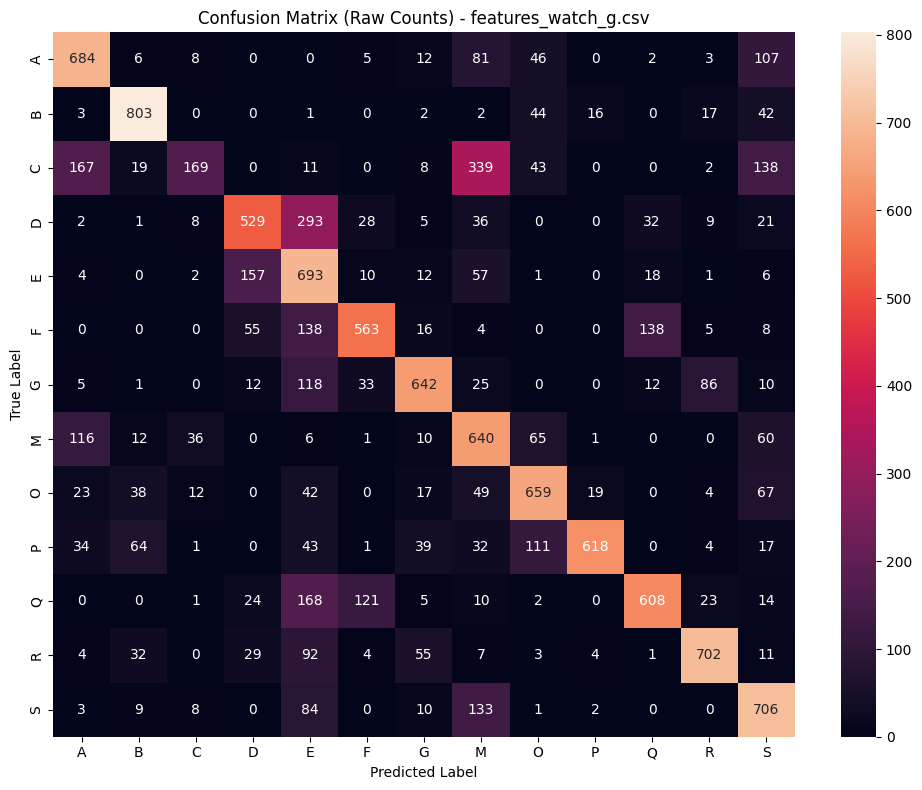

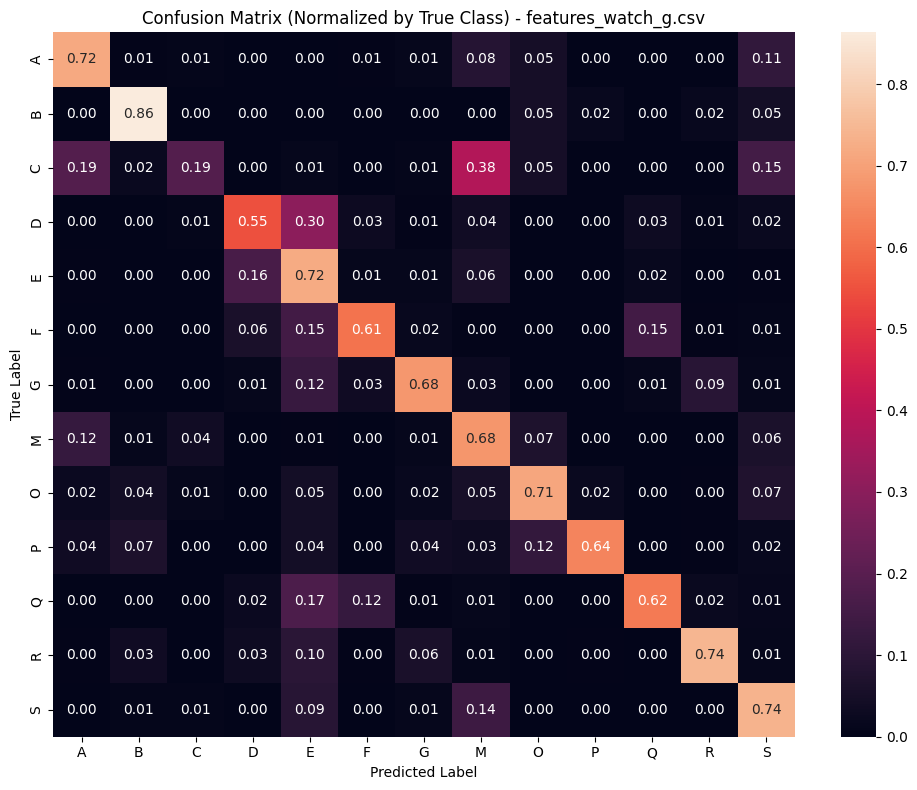


Average Classification Report:
A: Precision: 0.628, Recall: 0.729, F1-score: 0.653
B: Precision: 0.813, Recall: 0.864, F1-score: 0.817
C: Precision: 0.628, Recall: 0.185, F1-score: 0.273
D: Precision: 0.646, Recall: 0.574, F1-score: 0.556
E: Precision: 0.640, Recall: 0.699, F1-score: 0.629
F: Precision: 0.662, Recall: 0.619, F1-score: 0.619
G: Precision: 0.789, Recall: 0.700, F1-score: 0.724
M: Precision: 0.478, Recall: 0.671, F1-score: 0.535
O: Precision: 0.662, Recall: 0.698, F1-score: 0.656
P: Precision: 0.797, Recall: 0.676, F1-score: 0.701
Q: Precision: 0.680, Recall: 0.668, F1-score: 0.660
R: Precision: 0.778, Recall: 0.772, F1-score: 0.746
S: Precision: 0.631, Recall: 0.771, F1-score: 0.665

Overall Accuracy: 0.664


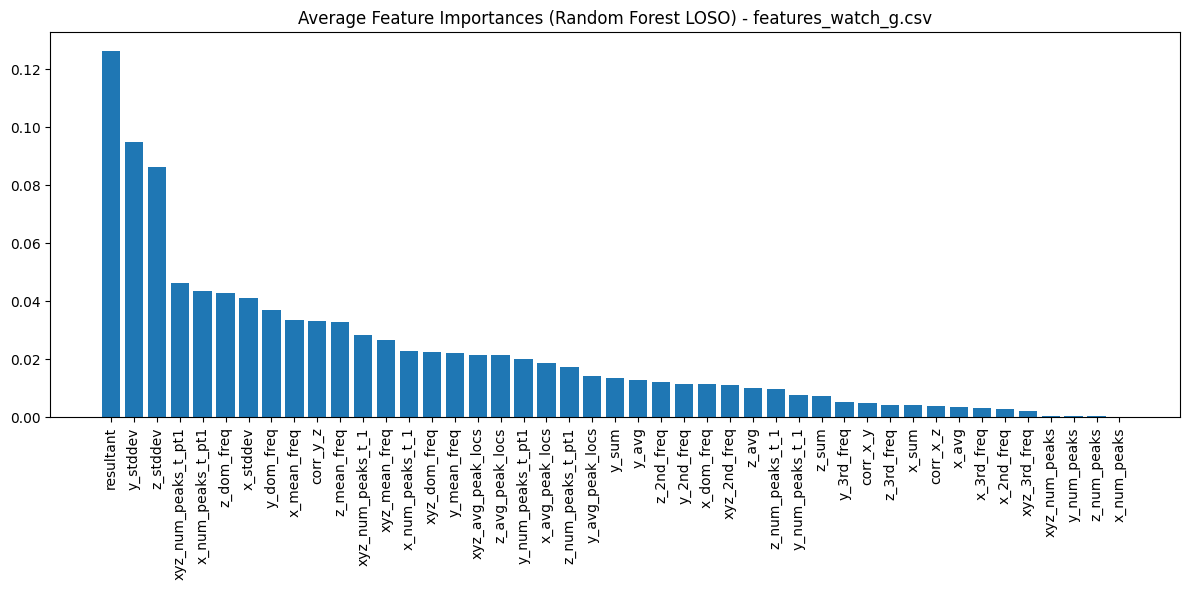


=== Running LOSO on features_phone_a.csv ===
Average Train Accuracy: 0.539
Average Test Accuracy:  0.431

Average Confusion Matrix (Normalized by True Class):
[[7.37536657e-01 6.45161290e-02 1.04105572e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 5.13196481e-02
  5.86510264e-03 3.59237537e-02 0.00000000e+00 0.00000000e+00
  7.33137830e-04]
 [6.87547746e-02 9.18258212e-01 2.29182582e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 5.34759358e-03
  3.81970970e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.52788388e-03]
 [3.87771521e-01 2.49396621e-02 2.89621883e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 8.04505229e-04 2.14802896e-01
  3.37892196e-02 4.02252615e-02 0.00000000e+00 0.00000000e+00
  8.04505229e-03]
 [0.00000000e+00 0.00000000e+00 7.76397516e-04 2.29813665e-01
  1.19565217e-01 5.04658385e-02 9.39440994e-02 8.54037267e-03
  1.55279503e-02 3.10559006e-03 3.22204969e-01 6.90993789e-02
  8.69565217e-02]
 [0.00000000e+00 0.00000

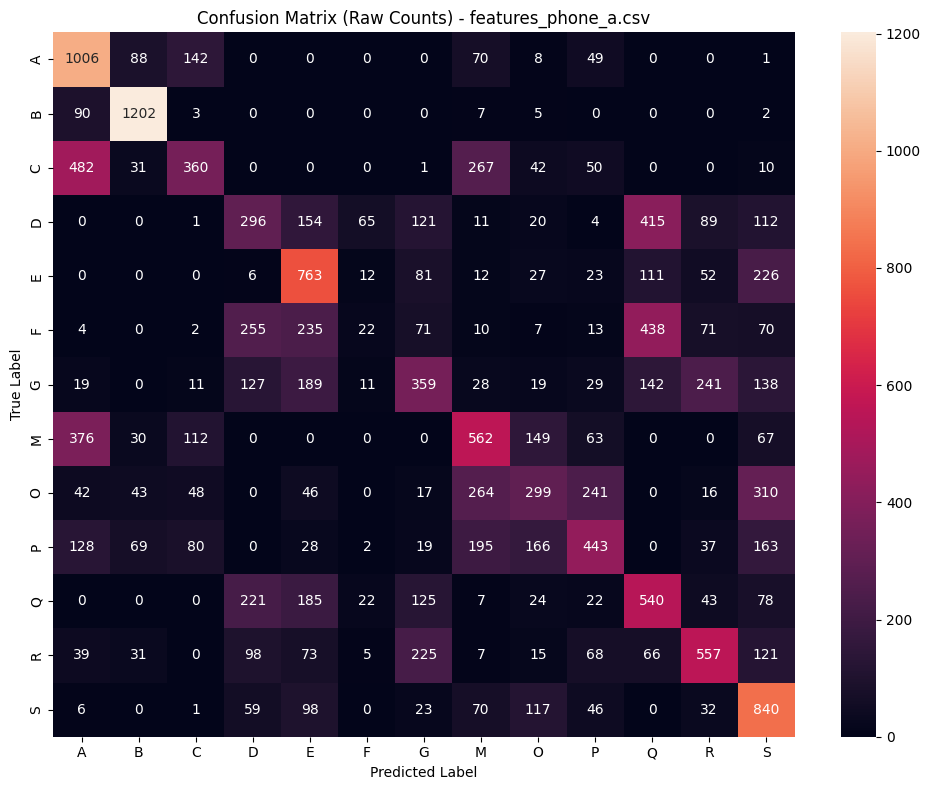

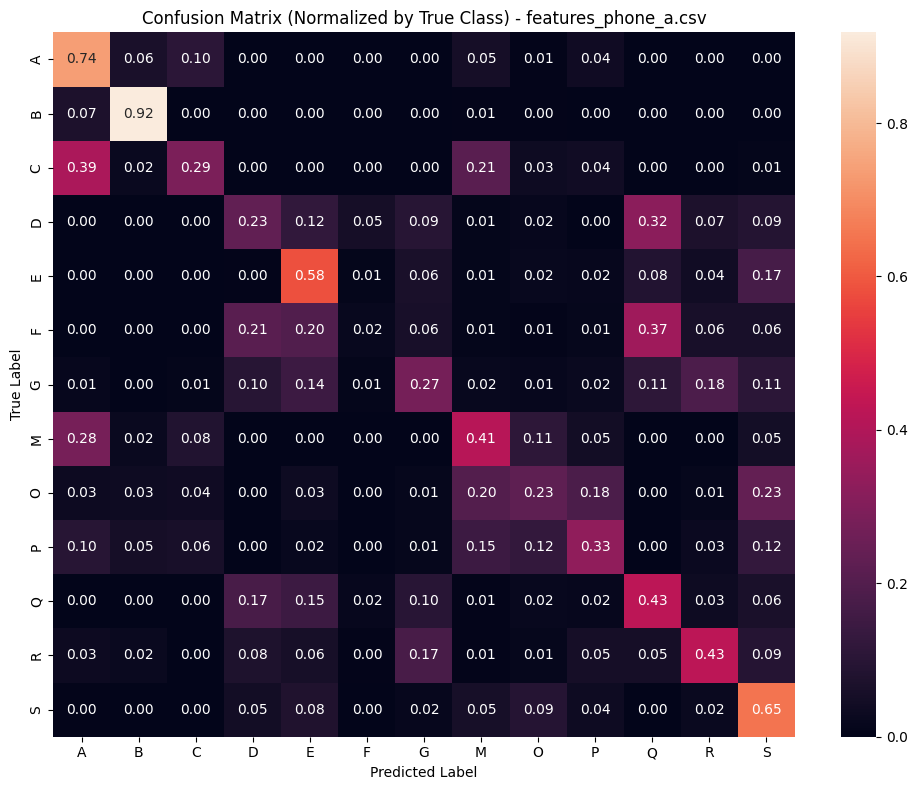


Average Classification Report:
A: Precision: 0.490, Recall: 0.796, F1-score: 0.568
B: Precision: 0.858, Recall: 0.898, F1-score: 0.836
C: Precision: 0.503, Recall: 0.317, F1-score: 0.350
D: Precision: 0.350, Recall: 0.262, F1-score: 0.247
E: Precision: 0.552, Recall: 0.605, F1-score: 0.531
F: Precision: 0.092, Recall: 0.017, F1-score: 0.026
G: Precision: 0.324, Recall: 0.216, F1-score: 0.211
M: Precision: 0.415, Recall: 0.403, F1-score: 0.381
O: Precision: 0.354, Recall: 0.242, F1-score: 0.254
P: Precision: 0.436, Recall: 0.323, F1-score: 0.342
Q: Precision: 0.320, Recall: 0.405, F1-score: 0.314
R: Precision: 0.436, Recall: 0.467, F1-score: 0.417
S: Precision: 0.417, Recall: 0.633, F1-score: 0.488

Overall Accuracy: 0.431


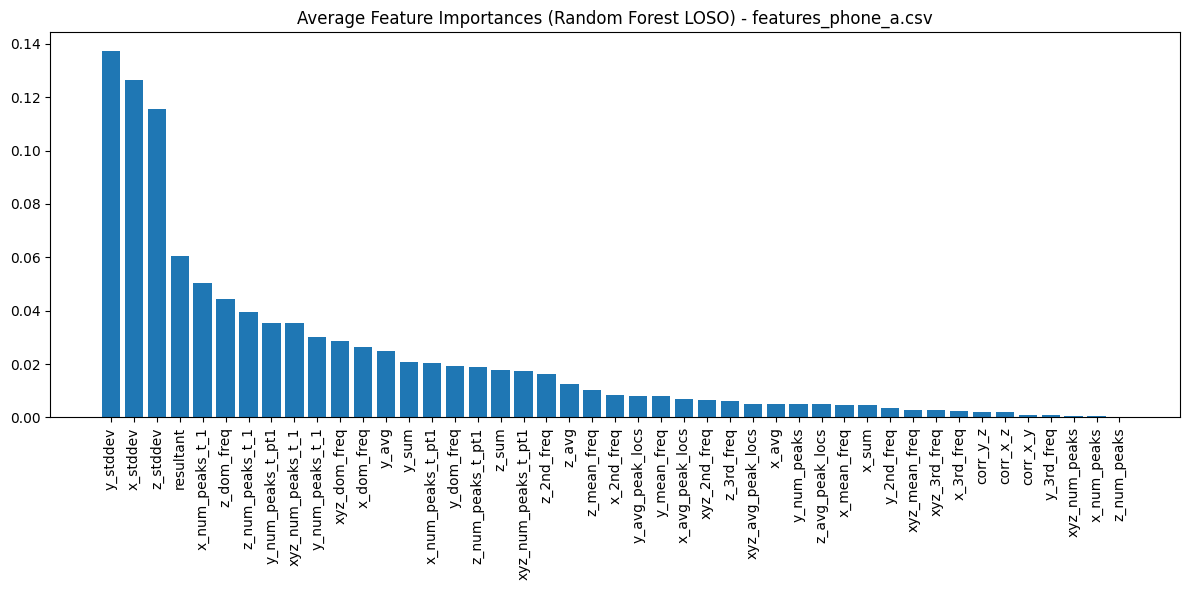


=== Running LOSO on features_phone_g.csv ===
Average Train Accuracy: 0.516
Average Test Accuracy:  0.442

Average Confusion Matrix (Normalized by True Class):
[[0.70630081 0.11382114 0.02947154 0.         0.         0.
  0.         0.1097561  0.02235772 0.01727642 0.         0.00101626
  0.        ]
 [0.09307135 0.83867632 0.00827301 0.         0.         0.
  0.         0.05997932 0.         0.         0.         0.
  0.        ]
 [0.13536201 0.0524659  0.51206716 0.         0.         0.
  0.         0.24134313 0.02413431 0.03147954 0.         0.
  0.00314795]
 [0.00102564 0.         0.01025641 0.1774359  0.19282051 0.00615385
  0.08410256 0.01846154 0.00717949 0.01128205 0.27897436 0.09128205
  0.12102564]
 [0.         0.00102564 0.00205128 0.02974359 0.42564103 0.
  0.03897436 0.01128205 0.01846154 0.03384615 0.19692308 0.04205128
  0.2       ]
 [0.01280683 0.00640342 0.         0.04802561 0.14407684 0.00320171
  0.113127   0.00640342 0.00640342 0.00640342 0.46531483 0.10885806
  

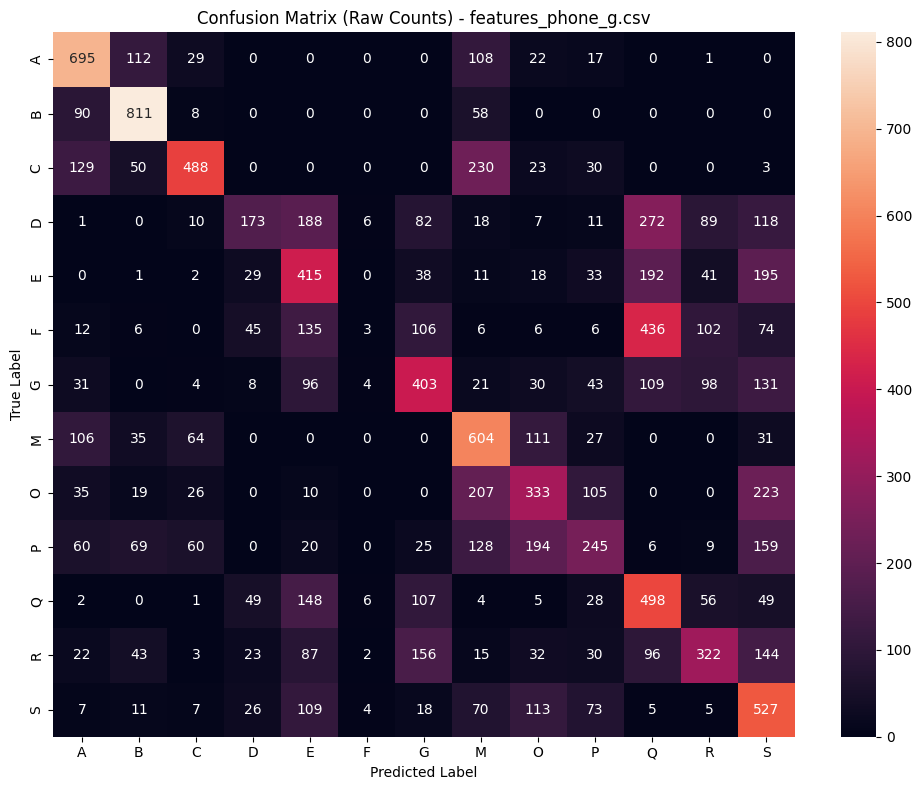

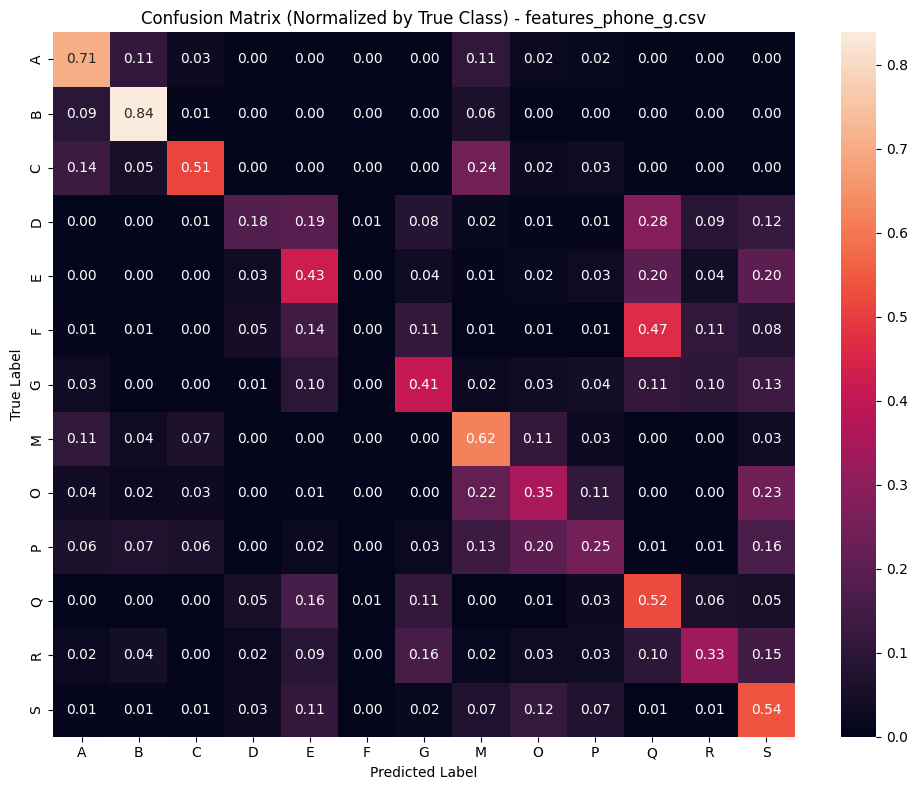


Average Classification Report:
A: Precision: 0.640, Recall: 0.729, F1-score: 0.653
B: Precision: 0.767, Recall: 0.843, F1-score: 0.759
C: Precision: 0.664, Recall: 0.509, F1-score: 0.554
D: Precision: 0.520, Recall: 0.182, F1-score: 0.224
E: Precision: 0.390, Recall: 0.424, F1-score: 0.381
F: Precision: 0.046, Recall: 0.003, F1-score: 0.006
G: Precision: 0.397, Recall: 0.407, F1-score: 0.370
M: Precision: 0.460, Recall: 0.628, F1-score: 0.499
O: Precision: 0.384, Recall: 0.357, F1-score: 0.337
P: Precision: 0.483, Recall: 0.260, F1-score: 0.290
Q: Precision: 0.328, Recall: 0.495, F1-score: 0.357
R: Precision: 0.485, Recall: 0.338, F1-score: 0.351
S: Precision: 0.337, Recall: 0.544, F1-score: 0.399

Overall Accuracy: 0.442


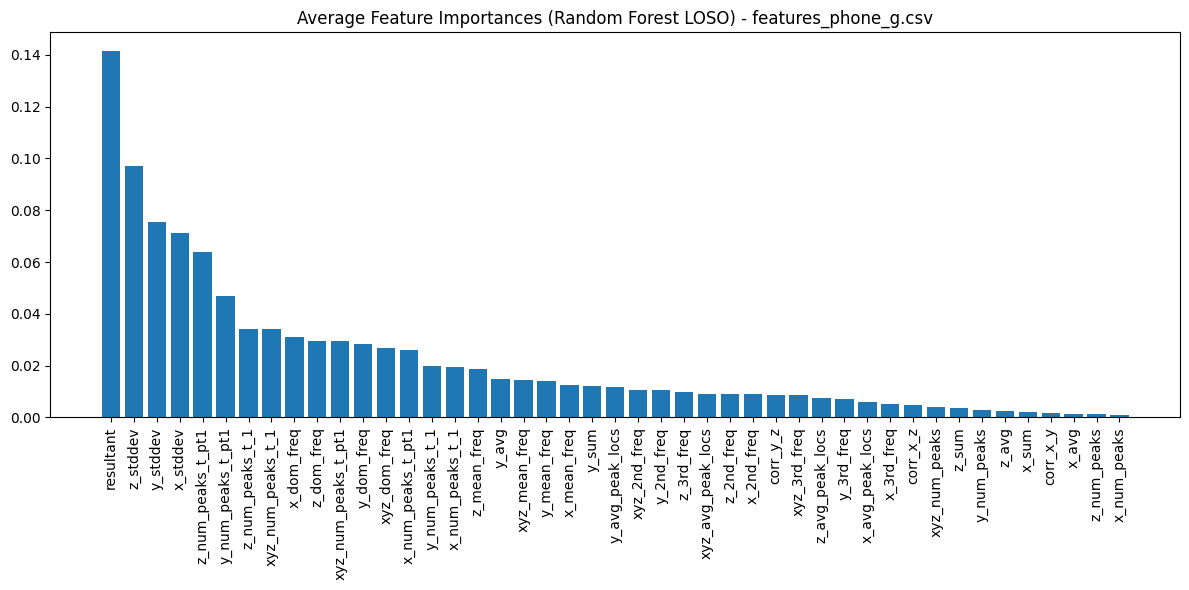

In [5]:
for file in dataset_files:
    print(f"\n=== Running LOSO on {file} ===")
    df_dd = dd.read_csv(path + file)
    df = df_dd.compute()

    # Drop eating-related activities
    eating_activities = ['H', 'I', 'J', 'K', 'L']
    
    df = df[~df['activity'].isin(eating_activities)].reset_index(drop=True)
    
    subject_ids = df['sub_id'].unique()

    label_enc = LabelEncoder()
    df['activity_encoded'] = label_enc.fit_transform(df['activity'])

    drop_cols = ['sub_id', 'group_id', 'activity', 'activity_encoded']
    X_all = df.drop(columns=drop_cols)
    y_all = df['activity_encoded']

    n_classes = len(label_enc.classes_)
    n_features = X_all.shape[1]

    @delayed
    def run_loso_fold(test_sub):
        train_mask = df['sub_id'] != test_sub
        test_mask = df['sub_id'] == test_sub

        X_train = X_all.loc[train_mask]
        y_train = y_all.loc[train_mask]
        X_test = X_all.loc[test_mask]
        y_test = y_all.loc[test_mask]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        rf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=5, min_samples_split=5, random_state=42, n_jobs=-1)
        rf.fit(X_train_scaled, y_train)

        y_train_pred = rf.predict(X_train_scaled)
        y_test_pred = rf.predict(X_test_scaled)

        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)

        cm = confusion_matrix(y_test, y_test_pred, labels=range(n_classes))
        report = classification_report(y_test, y_test_pred, output_dict=True, zero_division=0)
        feature_importances = rf.feature_importances_

        return train_acc, test_acc, cm, report, feature_importances

    results = [run_loso_fold(test_sub) for test_sub in subject_ids]
    train_accs, test_accs, cms, reports, feature_imps = zip(*compute(*results))

    avg_train_acc = np.mean(train_accs)
    avg_test_acc = np.mean(test_accs)
    conf_matrix_sum = np.sum(cms, axis=0)
    avg_feature_importances = np.mean(feature_imps, axis=0)
    conf_matrix_avg = conf_matrix_sum / conf_matrix_sum.sum(axis=1, keepdims=True)

    summary_results.append({
        "Dataset": file,
        "Train Accuracy": avg_train_acc,
        "Test Accuracy": avg_test_acc
    })
    
    avg_report = average_classification_reports(reports)

    print(f"Average Train Accuracy: {avg_train_acc:.3f}")
    print(f"Average Test Accuracy:  {avg_test_acc:.3f}")
    print("\nAverage Confusion Matrix (Normalized by True Class):")
    print(conf_matrix_avg)
    print("\nAverage Confusion Matrix (Raw counts):")
    print(conf_matrix_sum)

    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix_sum, annot=True, fmt='d',
                xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
    plt.title(f"Confusion Matrix (Raw Counts) - {file}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix_avg, annot=True, fmt='.2f',
                xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
    plt.title(f"Confusion Matrix (Normalized by True Class) - {file}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

    print("\nAverage Classification Report:")
    for label_idx, label_name in enumerate(label_enc.classes_):
        pr = avg_report[str(label_idx)]
        print(f"{label_name}: Precision: {pr['precision']:.3f}, Recall: {pr['recall']:.3f}, F1-score: {pr['f1-score']:.3f}")

    print(f"\nOverall Accuracy: {avg_report['accuracy']:.3f}")

    feature_names = X_all.columns
    indices = np.argsort(avg_feature_importances)[::-1]
    top_n = 45

    plt.figure(figsize=(12, 6))
    plt.title(f"Average Feature Importances (Random Forest LOSO) - {file}")
    plt.bar(range(top_n), avg_feature_importances[indices[:top_n]], align='center')
    plt.xticks(range(top_n), feature_names[indices[:top_n]], rotation=90)
    plt.tight_layout()
    plt.show()


In [6]:
summary_df = pd.DataFrame(summary_results)
print("\n=== Summary of Train and Test Accuracies ===")
print(summary_df.to_string(index=False))



=== Summary of Train and Test Accuracies ===
             Dataset  Train Accuracy  Test Accuracy
features_watch_a.csv        0.739489       0.723483
features_watch_g.csv        0.703221       0.664199
features_phone_a.csv        0.539144       0.430581
features_phone_g.csv        0.515596       0.442327
